<a href="https://colab.research.google.com/github/ksarfo12/Boston-House-Price-Prediction/blob/main/Fashion_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
# To install the latest version of TensorFlow
!pip install --upgrade tensorflow

# To install a specific version of TensorFlow, e.g., version 2.5.0
#!pip install tensorflow==2.5.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
      Successfully

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [11]:

class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boots']

2


In [18]:
train_images=train_images/255
test_images=test_images/255

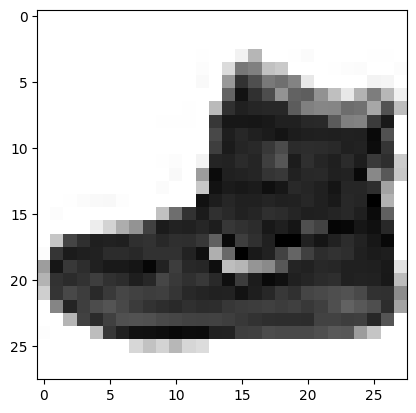

(28, 28)


In [21]:
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show()
print(train_images[7].shape)

In [22]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(train_images,train_labels,epochs=5)
test_loss,test_acc=model.evaluate(test_images,test_labels)
print(f"Test_accuracy: {test_acc} and Test_loss: {test_loss}")

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5042 - accuracy: 0.8226
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3796 - accuracy: 0.8635
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3390 - accuracy: 0.8760
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3150 - accuracy: 0.8846
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3530 - accuracy: 0.8694
Test_accuracy: 0.8694000244140625 and Test_loss: 0.3529859483242035


In [23]:
prediction=model.predict(train_images)
print(prediction[0])
print(class_names[np.argmax(prediction[0])])

1875/1875 [==============================] - 5s 3ms/step
[1.4152972e-10 1.7545256e-10 6.7958751e-12 9.2804701e-11 3.8852550e-11
 1.7423114e-05 9.5181543e-09 6.6771376e-04 7.5735144e-08 9.9931473e-01]
Ankle Boots


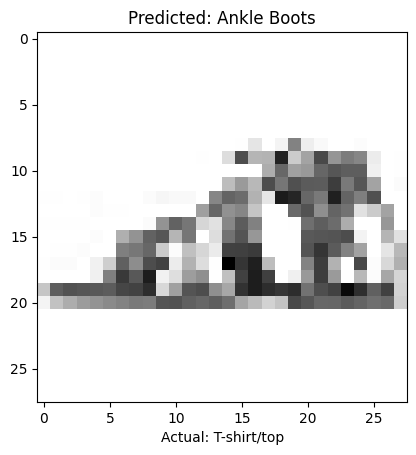

In [37]:
#Validation
#for i in range(len(prediction)):
#      print(f"Predicted item:{class_names[np.argmax(prediction[i])]} , Expected Outcome: {class_names[np.argmax(test_labels[i])]} ")
for i in range(7,12):
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel(f"Actual: {class_names[np.argmax(test_labels[i])]}")
  plt.title(f"Predicted: {class_names[np.argmax(prediction[i])]}")